In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [2]:
base_file_loc = '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'


In [3]:
!ls /home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT

MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_ccbar.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_charged.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_ddbar.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_mixed.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_ssbar.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_taupair.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_uubar.root
config.yaml
draw_all_stack_histo2.py
etaeta_gg_tag.log
etaeta_gpi_tag.log
etaeta_pipi_tag.log
etapip_gg.log
etapip_gg_K.log
etapip_pipipi.log
etapip_pipipi_K.log
submit.sh
topo


In [4]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '/*ccbar.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '/*uubar.root'
generic_ddbar = base_file_loc + '/*ddbar.root'
generic_ssbar = base_file_loc + '/*ssbar.root'
generic_charged = base_file_loc + '/*charged.root'
generic_mixed = base_file_loc + '/*mixed.root'
generic_taupair = base_file_loc + '/*taupair.root'

In [5]:
base_filter=' Dp_M>0'
# base_filter='etapip_gg_rank==1'
# base_filter+= '  && bdt>0.4'

# base_filter += ' && ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
# base_filter += ' && ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
# base_filter += ' && Pip_pionID > 0.6'
# base_filter += ' && etapip_Eta_p > 0.8'
# base_filter += ' && etapip_Eta_M > 0.52'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
# base_filter += ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# base_filter += ' && dM_pi0_75MeV>0.011 && dM_pi0_75MeV_2>0.011 && Dp_CMS_p>3'

# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'



# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"

# 0.523598
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '


In [6]:
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
             #'bdt'



In [7]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

input_line_84:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_95:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_102:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [8]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [9]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

14393431
16090988
0.894502624698993


In [10]:
cut = 'Dp_M>0.0'

# cut = 'bdt>0.4'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [11]:
# Extract the directory from the file path
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_yes_tag/cut_study"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [12]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

In [13]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",force_range=tuple(),unit="[GeV/c^2]" ):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range,save_repo=img_path)
    plt.tight_layout()

    # plt.savefig(img_path)

In [14]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

[206871. 205459. 203731. 202066. 198999. 197125. 195331. 192594. 190650.
 188837. 186679. 183965. 182592. 179747. 176845. 174781. 172378. 169162.
 167230. 165670. 162661. 160449. 158508. 156121. 155206. 152966. 151384.
 150915. 149800. 150513. 151930. 155404. 159515. 160945. 157479. 151965.
 145379. 140066. 137227. 135063. 134250. 132916. 132366. 130066. 130142.
 130610. 130224. 131164. 133733. 137839. 145421. 156921. 166160. 170772.
 164081. 149609. 136370. 126976. 120971. 117815. 116101. 114120. 113559.
 112804. 111710. 111188. 109972. 109608. 108864. 107643.]
fitst_bin_entries=206871.0


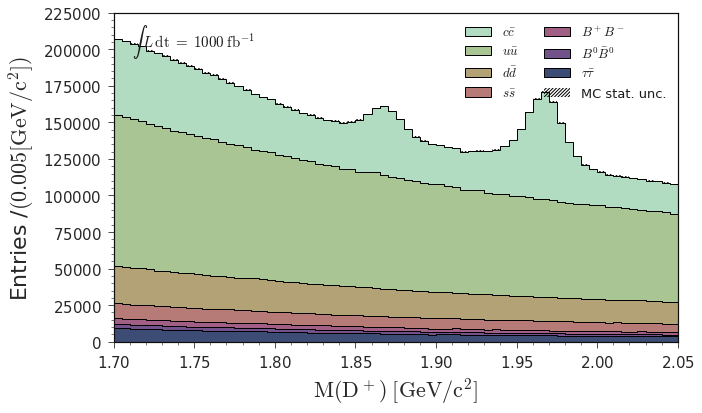

In [15]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.67,2.1)
xrange = (1.7,2.05)

nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_all.png"

# img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="")
# plt.ylim(0,90000)
plt.savefig(img_path)


[0.0000000e+00 1.5308449e+07 0.0000000e+00 6.3237000e+05 1.1896100e+05
 2.3731000e+04 5.5270000e+03 1.3540000e+03 3.8900000e+02 1.3200000e+02
 4.3000000e+01 2.5000000e+01]
fitst_bin_entries=0.0


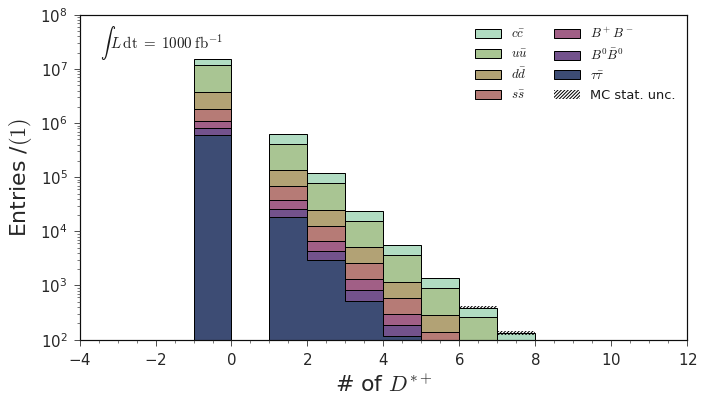

In [16]:
var = 'num_Dstar_no_nan'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.67,2.1)
xrange = (-2,10)
nbins = 12
xlabel = r"# of $D^{*+}$"
unit = ""

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_all_num_Dstar_no_nan.png"

# img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",unit=unit)
# plt.ylim(0,90000)
plt.yscale("log")
# plt.tight_layout()
plt.savefig(img_path)


In [17]:
cut = 'Dp_M>0.0'
cut += ' & num_Dstar_no_nan>0'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[ 9323.  9794.  9472.  9384.  9133.  9120.  9113.  9027.  8850.  8787.
  8791.  8712.  8824.  8414.  8575.  8310.  8201.  8137.  8008.  8054.
  7809.  7833.  7790.  7476.  7681.  7678.  7612.  7523.  7470.  7915.
  8506.  9200. 10227. 10884. 10460.  9439.  8421.  7383.  7052.  6639.
  6677.  6624.  6647.  6419.  6350.  6406.  6497.  6489.  6434.  6498.
  6782.  7039.  7357.  7471.  7286.  6839.  6431.  6112.  5969.  6023.
  5901.  5952.  5790.  5959.  5830.  5694.  5723.  5630.  5531.  5490.]
fitst_bin_entries=9323.0


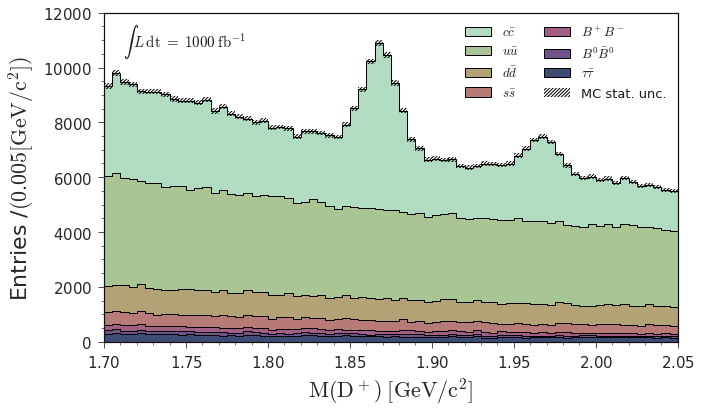

In [18]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_step1_Dstartag.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [19]:
cut = 'Dp_M>0.0'
cut += ' & abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# cut += ' & Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[6634. 6622. 6437. 6323. 6317. 6111. 6017. 5912. 6068. 5719. 5822. 5565.
 5461. 5390. 5195. 5238. 5080. 5060. 5025. 5015. 5203. 6027. 7442. 9157.
 9358. 7615. 5662. 4774. 4234. 4188. 4188. 4004. 4082. 4144. 4200. 4326.
 4838. 5378. 5423. 4914. 4259. 3811. 3756. 3646. 3575. 3600. 3526. 3507.
 3416. 3309.]
fitst_bin_entries=6634.0


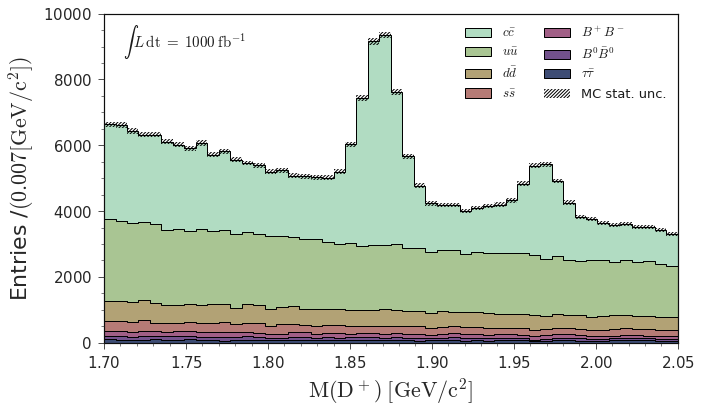

In [20]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step2.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_step2_eta_angle_cuts.png"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

## FOM

In [21]:
pd_ccbar_bkg = pd_ccbar.query('Dp_isSignal!=1')
pd_all = pd.concat([pd_ccbar_bkg,
                    pd_uubar,
                    pd_ddbar,
                    pd_ssbar,
                    pd_charged,
                    pd_mixed,
                    pd_taupair], ignore_index=True)

# pd_all = pd_ccbar

In [22]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [23]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [24]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [25]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    # par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    # par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    # p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    # lns = [p1, p2, p3]
    lns = [p1, p2]

    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    # par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^+ \to \eta_{\gamma\gamma} \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [26]:
def calculate_FOM_3D(bkg_pd, sig_pd, grid_list, scale_factor, cut_x, cut_y, cut_z):
 
    FOM_list = list()
    
    for points_3d in grid_list:
        
        points_3d_x, points_3d_y, points_3d_z =  points_3d[0], points_3d[1], points_3d[2]
    
        temp_cut = cut_x + str(points_3d_x) + ' & ' +  cut_y + str(points_3d_y) + ' & ' + cut_z + str(points_3d_z) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)    
        
        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)
        # print(str(scale_factor*nsig + nbkg) + ' nsig=' + str(nsig) + ', nbkg=' + str(nbkg) + ', cut=' + temp_cut )
#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM_list.append(FOM)    
        
    return FOM_list

In [27]:
# # sigMC_file_loc = base_file_loc + 'topo/resultfile/result_phi/standard.root'
# sigMC_file_loc = base_file_loc + '/*ccbar.root'

# base_filter=' num_Dstar_no_nan>0 && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 && etapip_Eta_daughterAngle_0_1<1.7'
# # base_filter += '&& nSigCascDcyBr_0==1'
# base_filter += '&& Dp_isSignal==1'
# # base_filter+='&& abs(D0_cosHel_0)<0.8'

# # base_filter += '&& gamma_E>0.48'

# # variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
# tree='etapip_gg'

pd_ccbar_signal = pd_ccbar.query('Dp_isSignal==1')

# pd_ccbar_signal = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_ccbar_signal))

21511


In [28]:
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter += '&& Dstarp_isSignal==1'

# # base_filter += '&& gamma_E>0.48'


# pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


pd_half_1_sigMC = pd_ccbar_signal

scale_factor = len(pd_ccbar_signal)/len(pd_half_1_sigMC)
print(scale_factor)

1.0


In [29]:
list(pd_ccbar)

['__experiment__',
 '__run__',
 '__event__',
 'Dp_M',
 'Dp_isSignal',
 'Dp_CMS_p',
 'Dp_cosAngleBetweenMomentumAndVertexVector',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVector',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'etapip_Eta_M',
 'etapip_Eta_isSignal',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'etapip_Eta_Easym',
 'etapip_Eta_p',
 'etapip_gamma1_p',
 'etapip_gamma2_p',
 'etapip_gamma1_clusterNHits',
 'etapip_gamma2_clusterNHits',
 'etapip_gamma1_clusterReg',
 'etapip_gamma2_clusterReg',
 'Pip_pionID',
 'Pip_pionIDNN',
 'Pip_mcPDG',
 'Pip_dr',
 'Pip_p',
 'ROE_Mgg',
 'dM_pi0',
 'ROE_Mgg_50MeV',
 'dM_pi0_50MeV',
 'ROE_Mgg_75MeV',
 'dM_pi0_75MeV',
 'ROE_Mgg_mask',
 'dM_pi0_mask',
 'ROE_Mgg_2',
 'dM_pi0_2',
 'ROE_Mgg_50MeV_2',
 'dM_pi0_50MeV_2',
 'ROE_Mgg_75MeV_2',
 'dM_pi0_75MeV_2',
 'ROE_Mgg_mask_2',
 'dM_pi0_mask_2',
 'veto_isSignal',
 'veto_isSignal_50MeV',
 'veto_isSignal_75M

In [ ]:
X, Y, Z = np.mgrid[0.9900:0.9998:49j, 0.6:0.8:21j, 0.4:0.6:21j]
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)

grid_list = A_list
cut_x = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane > '
cut_y = 'etapip_Eta_p > '
cut_z = 'Pip_p > '

scale_factor=scale_factor

FOM_phig_list = calculate_FOM_3D(pd_all,pd_half_1_sigMC, grid_list ,scale_factor, cut_x,  cut_y, cut_z )


In [ ]:
# # Number to be equally divided
# number_to_divide = 2

# # Update each element in the list
# for i in range(len(FOM_phig_list)):
#     FOM_phig_list[i] = FOM_phig_list[i]/number_to_divide


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$\cos XY$ cut',fontsize=17)
#ax.set_ylabel(r'Second FBDT cut',fontsize=17)
ax.set_ylabel(r'$\eta$ p',fontsize=17)
ax.set_zlabel(r'$\pi^+$ p',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# Set axis ranges to their full extent
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())


# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=15.5


plt.tight_layout()
# plt.savefig('/media/jykim/T7/saved_plots/FOM/MC15rd_Eg_Mgg_FBDT2_phi_opt.png')
plt.show()

In [33]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=50.63039825544764, cut value=(0.01, 0.6, 0.41000000000000003)


In [37]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=52.77986106727667, cut value=(0.015, 0.7, 0.42000000000000004)


In [ ]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))